In [49]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)
# X = Age, Y = whether or not purchased

In [50]:
data = pd.read_csv('https://raw.githubusercontent.com/kjain25/AI4all/main/Social_Network_Ads.csv')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


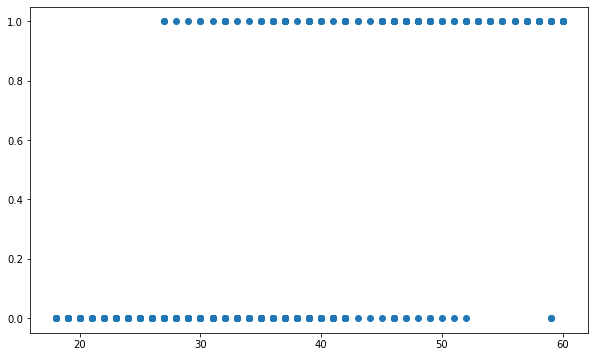

In [51]:
#Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

In [52]:
# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size = 0.2)

## Implementing without sklearn library

In [53]:
# Helper Function to normalize data
def normalize(X):
    return X - X.mean()
# Method to make predictions
def predict(X, b, m):
    return np.array([1 / (1 + exp(-1 * b + -1 * m * x)) for x in X])
#Method to train the model
def logistic_regression(X, Y):
    X = normalize(X)
    
    b = 0
    m = 0
    L = 0.001
    epochs = 150
    
    for epoch in range(epochs):
        y_pred = predict(X, b, m)
        D_b = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_m = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred) * X)
        b = b - L * D_b
        m = m - L * D_m
    return b, m

b, m = logistic_regression(X_train, y_train)
print(b, m)

-0.8345899396260579 0.18501111112323798


In [54]:
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b, m)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]
y_pred

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0]

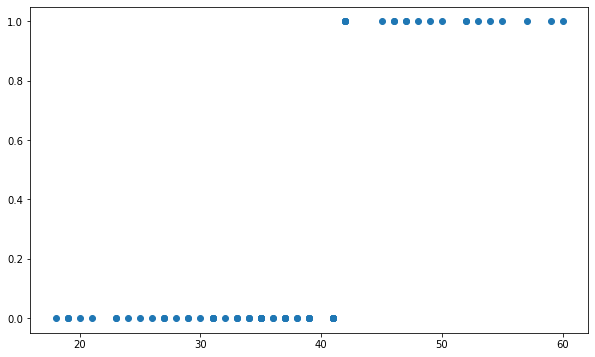

In [55]:
plt.scatter(X_test, y_pred)

In [56]:
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy/ len(y_pred)}")

Accuracy = 0.825


## Implementing with sklearn library

C:\Users\kjain\Anaconda_Python_workspace\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


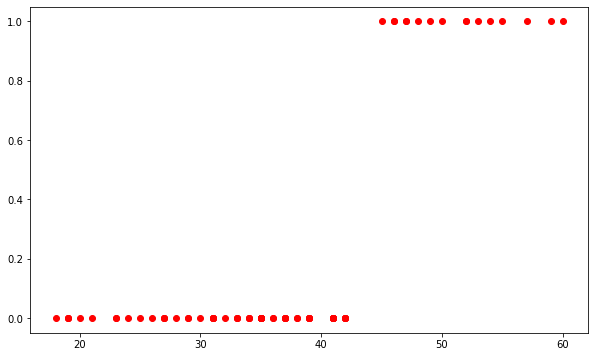

Accuracy = 0.8625


In [57]:
#Making predictions using Scikit Learn
from sklearn.linear_model import LogisticRegression

#Create an instance and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1, 1))

y_pred_sk = lr_model.predict(X_test.values.reshape(-1,1))

plt.clf()
plt.scatter(X_test, y_pred_sk, c = "red")
plt.show()

#Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))}")


# Sources
https://www.youtube.com/watch?v=l8VEth6leXA&t=625s